# 텍스트 전처리

## 1단계 > 데이터 수집

In [1]:
import zipfile  #압축을 풀기 위한 내장 라이브러리

In [3]:
DATA_IN_PATH = './datas/word2vec-nlp-tutorial/'
file_list = ['labeledTrainData.tsv.zip', 'testData.tsv.zip', 'unlabeledTrainData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH+file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

## 2단계 > EDA 탐색적 데이터 이해
- 데이터 크기
- 데이터 개수
- 각 리뷰의 문자 길이 분포, 많이 사용된 단어, 긍정 부정 데이터 분포, 각 리뷰의 단어 개수 분포, 특수문자, 대소문자 비율

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
DATA_IN_PATH = './datas/word2vec-nlp-tutorial/'
train_data = pd.read_csv(DATA_IN_PATH+'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


> id, sentiment(감정 label), review(텍스트)

- 데이터 크기(파일 크기)

In [8]:
DATA_IN_PATH = './datas/word2vec-nlp-tutorial/'
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))+'MB')

labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


- 데이터 개수

In [9]:
print('전체 학습데이터 개수 : {}'.format(len(train_data)))

전체 학습데이터 개수 : 25000


- 각 리뷰의 문자 길이 분포

In [9]:
train_review_length = train_data['review'].apply(len)
train_review_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

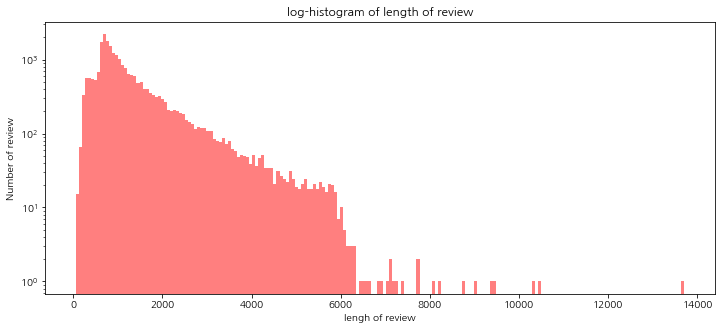

In [24]:
plt.figure(figsize=(12,5)) #그래프 이미지 사이즈 선언
plt.hist(train_review_length, bins=200, color='r', alpha=0.5, label='word') #히스토그램 그리기
plt.yscale('log')
plt.title('log-histogram of length of review')
plt.xlabel('lengh of review')
plt.ylabel('Number of review')

In [25]:
print('리뷰 문자 최소 길이: {}'.format(np.min(train_review_length)))
print('리뷰 문자 최대 길이: {}'.format(np.max(train_review_length)))
print('리뷰 문자 평균 길이: {:.2f}'.format(np.mean(train_review_length)))
print('리뷰 문자 표준편차 길이: {:.2f}'.format(np.std(train_review_length)))
print('리뷰 문자 중앙값: {}'.format(np.median(train_review_length)))
print('리뷰 문자 길이 1사분위: {}'.format(np.percentile(train_review_length, 25)))
print('리뷰 문자 길이 3사분위: {}'.format(np.percentile(train_review_length, 75)))


리뷰 문자 최소 길이: 54
리뷰 문자 최대 길이: 13710
리뷰 문자 평균 길이: 1329.71
리뷰 문자 표준편차 길이: 1005.22
리뷰 문자 중앙값: 983.0
리뷰 문자 길이 1사분위: 705.0
리뷰 문자 길이 3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22800bc2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x22800bd0130>,
 'boxes': [<matplotlib.lines.Line2D at 0x22800bc2880>],
 'medians': [<matplotlib.lines.Line2D at 0x22800bd06d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22800bd0c70>],
 'means': [<matplotlib.lines.Line2D at 0x22800bd09a0>]}

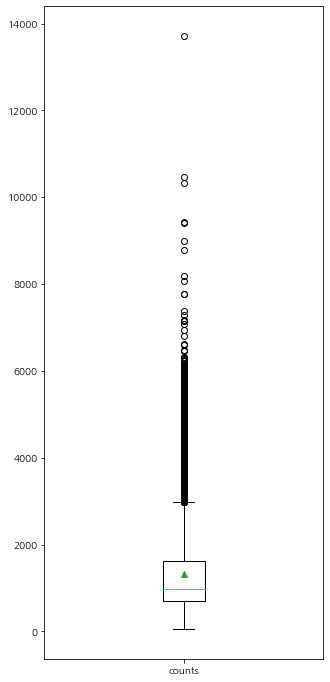

In [27]:
#박스플롯으로 
plt.figure(figsize=(5, 12))
plt.boxplot(train_review_length, labels=['counts'], showmeans=True)

- 많이 사용된 단어

(-0.5, 799.5, 599.5, -0.5)

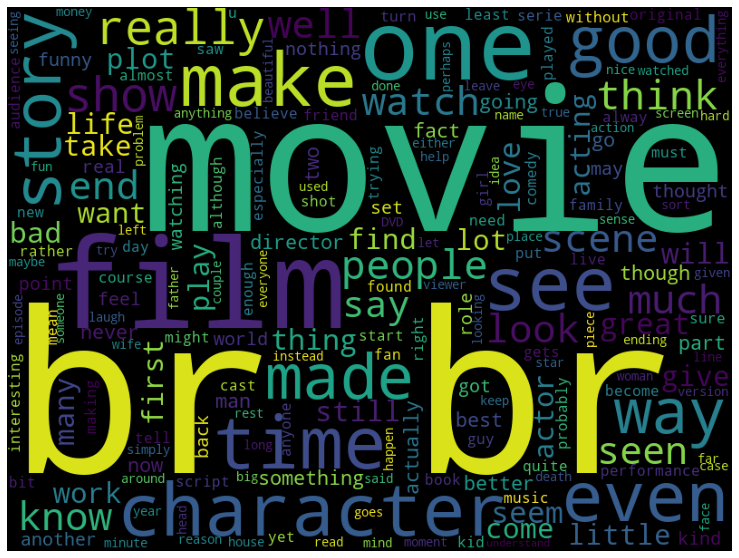

In [30]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(''.join(train_data['review']))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

- 긍, 부정 데이터의 분포

C:\Users\user\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

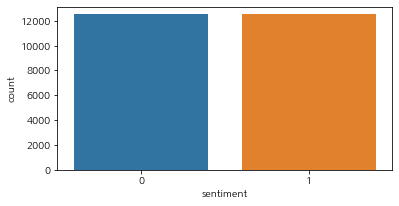

In [36]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [37]:
print('긍정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수 : {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수 : 12500
부정 리뷰 개수 : 12500


- 띄어쓰기 기준으로 토큰화된 단어의 개수 분포 > 대부분 1000미만

In [10]:
train_word_counts = train_data['review'].apply(lambda x : len(x.split(' ')))
train_word_counts.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

Text(0, 0.5, 'Number of reviews')

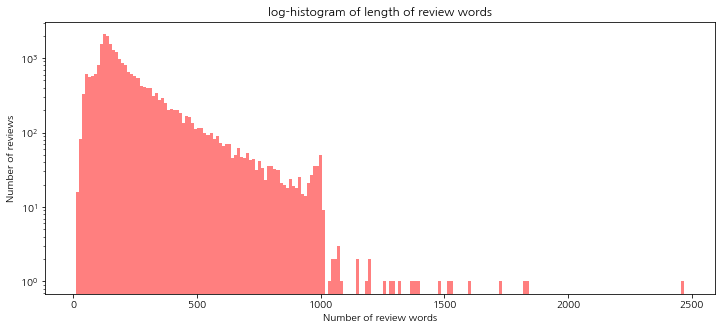

In [42]:
plt.figure(figsize=(12,5)) #그래프 이미지 사이즈 선언
plt.hist(train_word_counts, bins=200, color='r', alpha=0.5, label='word') #히스토그램 그리기
plt.yscale('log')
plt.title('log-histogram of length of review words')
plt.xlabel('Number of review words')
plt.ylabel('Number of reviews')

In [40]:
print('리뷰 단어 최소 길이: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 최대 길이: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 평균 길이: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 표준편차 길이: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 중앙값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 길이 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 길이 3사분위: {}'.format(np.percentile(train_word_counts, 75)))


리뷰 단어 최소 길이: 10
리뷰 단어 최대 길이: 2470
리뷰 단어 평균 길이: 233.79
리뷰 단어 표준편차 길이: 173.74
리뷰 단어 중앙값: 174.0
리뷰 단어 길이 1사분위: 127.0
리뷰 단어 길이 3사분위: 284.0


- 특수문자, 대소문자 비율

In [6]:
qmarks = np.mean(train_data['review'].apply(lambda x : '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x : '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x : x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x : max([y.isdigit() for y in x])))

print('물음표가 있는 Review : {:.2f}%'.format(qmarks*100))
print('마침표가 있는 Review : {:.2f}%'.format(fullstop*100))
print('첫문자가 대문자인 Review : {:.2f}%'.format(capital_first*100))
print('대문자가 있는 Review : {:.2f}%'.format(capitals*100))
print('숫자가 있는 Review : {:.2f}%'.format(numbers*100))

물음표가 있는 Review : 29.55%
마침표가 있는 Review : 99.69%
첫문자가 대문자인 Review : 0.00%
대문자가 있는 Review : 99.59%
숫자가 있는 Review : 56.66%


- 데이터 전처리 : 대문자를 소문자로 변환, 특수문자 제거 정제

In [13]:
import re
from bs4 import BeautifulSoup #태그 제거 정제 작업을 위한 라이브러리
from nltk.corpus import stopwords  #영어 불용어 제거

review = train_data['review'][0]
print(review)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
review_text = BeautifulSoup(review, 'html.parser').get_text()  #html 태그 제거
print(review_text)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [9]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, 'html').get_text()  #html 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [10]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower() #소문자 변환
words = review_text.split()       #단어 토큰화
words = [w for w in words if not w in stop_words] #불용어 제거
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [50]:
len(words)

219

In [11]:
clean_review = ''.join(words)
print(clean_review)

stuffgoingmomentmjstartedlisteningmusicwatchingodddocumentarywatchedwizwatchedmoonwalkermaybewantgetcertaininsightguythoughtreallycooleightiesmaybemakemindwhetherguiltyinnocentmoonwalkerpartbiographypartfeaturefilmremembergoingseecinemaoriginallyreleasedsubtlemessagesmjfeelingtowardspressalsoobviousmessagedrugsbadkayvisuallyimpressivecoursemichaeljacksonunlessremotelylikemjanywaygoinghatefindboringmaycallmjegotistconsentingmakingmoviemjfanswouldsaymadefanstruereallyniceactualfeaturefilmbitfinallystartsminutesexcludingsmoothcriminalsequencejoepesciconvincingpsychopathicpowerfuldruglordwantsmjdeadbadbeyondmjoverheardplansnahjoepescicharacterrantedwantedpeopleknowsupplyingdrugsetcdunnomaybehatesmjmusiclotscoolthingslikemjturningcarrobotwholespeeddemonsequencealsodirectormustpatiencesaintcamefilmingkiddybadsequenceusuallydirectorshateworkingonekidletalonewholebunchperformingcomplexdancescenebottomlinemoviepeoplelikemjonelevelanotherthinkpeoplestayawaytrygivewholesomemessageironicallymjbest

- 데이터 전처리 과정을 함수로 정의하고 모든 Review 데이터에 적용

In [14]:
def review_preproces(review, remove_stopwords = False): #불용어 제거는 선택 옵션으로 정의
    review_text = BeautifulSoup(review, 'html').get_text()  #html 태그 제거
    review_text = re.sub("[^a-zA-Z]", " ", review_text)     #영어를 제외한 특수문자, 숫자 등 제거
    review_text = review_text.lower()                       #소문자 변환
    words = review_text.split()       #단어 토큰화
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words] #불용어 제거
        clean_review = ' '.join(words)
    else:
        clean_review = ' '.join(words)
    
    return clean_review

- 모든 Review 데이터에 텍스트 전처리 적용

In [15]:
clean_reviews = []
for review in train_data['review']:
    clean_reviews.append(review_preproces(review, remove_stopwords=True))

C:\Users\user\miniconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
clean_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

- 전체 데이터를 DataFrame으로 생성 > 수치 벡터화

In [17]:
clean_train_df = pd.DataFrame({'review': clean_reviews, 'sentiment': train_data['sentiment']})
print(clean_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [18]:
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


- Review 텍스트를 정수 인덱스로 변환 후 패딩처리 > 벡터화

In [20]:
from lib2to3.pgen2.tokenize import tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_reviews)
#print('단어집합 :', tokenizer.word_index) #1~74065 정수 인덱스화

In [21]:
text_sequences = tokenizer.texts_to_sequences(clean_reviews) #review 문장의 단어를 정수인덱스값으로 변환
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [22]:
word_vocab = tokenizer.word_index
print('전체 단어 개수:', len(word_vocab)+1)

전체 단어 개수: 74066


In [23]:
data_cofigs={}
data_cofigs['vocab'] = word_vocab
data_cofigs['vocab_size'] = len(word_vocab)

MAX_SEQUENCE_LENTH=174 #Review 최대 길이를 단어 개수의 중간값 174로 통일

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENTH, padding='post')
print('Shape of train data:', train_inputs.shape)

Shape of train data: (25000, 174)


- 전처리 과정을 마친 데이터를 모델에 사용하기 위해 4개의 형식으로 데이터를 저장
1. 정제된 텍스트 데이터를 csv파일로
2. 벡터화한 데이터를 numpy파일로
3. 정답 label 데이터를 numpy 파일로
4. 메타 정보를 json 파일로

In [24]:
TRAIN_CLEAN_DATA = 'train_clean.csv'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'
DATA_IN_PATH = './reviews/'

In [25]:
if not os.path.exists('./reviews/'):
    os.makedirs('./reviews/')

In [26]:
np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA,'wb'), train_inputs)
train_labels = np.array(train_data['sentiment'])
np.save(open(DATA_IN_PATH+TRAIN_LABEL_DATA,'wb'), train_labels)

- 정제된 텍스트를 csv 형태로 저장

In [27]:
clean_train_df.to_csv(DATA_IN_PATH+TRAIN_CLEAN_DATA, index=False)

- 데이터 사전을 json 형태로 저장

In [28]:
import json
json.dump(data_cofigs, open(DATA_IN_PATH+DATA_CONFIGS, 'w'), ensure_ascii=False)